In [1]:
import numpy as np
import pandapower as pp
from pandapower import plotting

In [2]:
#defining line and substation voltage levels

hv_b = 220
lv_b = 132

#cable resistance per km at 75 degrees

R_ac = 0.1742

i_lim      = 620

R_220OHL = R_ac
X_220OHL = 0.056
C_220OHL = 0.0064    
i_220OHL = i_lim/1000   

R_132OHL = R_ac
X_132OHL = 0.052
C_132OHL = 0.0065   
i_132OHL = i_lim/1000


T22132_MVA_rating = 160
T22132_VKR_rating = 1  #Real part of short circuit voltage
T22132_VK_rating  = 4 #Relative short circuit voltage
T22132_pfe_rating = 0.01*T22132_MVA_rating #Iron loss in KW, typically 1% of power rating
T22132_i0_rating  = 1 #Open loop loss, typically 1%

Power_factor = 0.9
Theta = np.arccos(Power_factor)
P2Q = np.tan(Theta)

In [3]:
net = pp.create_empty_network()

In [4]:
#Geolocations for buses found in QGIS; 
#Mallorca buses
Llubi_location        = (3.039425, 39.673758)
Son_Reus_location     = (2.678805, 39.650901)
Valldurgent_location  = (2.549208, 39.584228)
Es_Bessons_location   = (3.158756, 39.581939)
Son_Orlandis_location = (2.744143, 39.600178)
Muretar_location      = (3.081611, 39.809722)
Tresoare_location     = (2.689469, 39.567500)
Santa_Ponsa_location  = (2.508957, 39.537679)
GESA_location         = (3.427182, 39.738864)

Llubi_bus             = pp.create_bus(net, vn_kv=hv_b, name = "Central de Llubi", geodata= Llubi_location         )
Son_Reus_bus          = pp.create_bus(net, vn_kv=hv_b, name = "Son Reus",         geodata= Son_Reus_location      )
Valldurgent_bus       = pp.create_bus(net, vn_kv=hv_b, name = "Valldurgent",      geodata= Valldurgent_location   )
Es_Bessons_HV_bus     = pp.create_bus(net, vn_kv=hv_b, name = "Es Bessons HV",    geodata= Es_Bessons_location    )
Son_Orlandis_bus      = pp.create_bus(net, vn_kv=hv_b, name = "Son Orlandis",     geodata= Son_Orlandis_location  )
Muretar_bus           = pp.create_bus(net, vn_kv=hv_b, name = "Muretar PS",       geodata= Muretar_location       )
Tresoare_bus          = pp.create_bus(net, vn_kv=hv_b, name = "Tresoare PS",      geodata= Tresoare_location      )
Santa_Ponsa_HV_bus    = pp.create_bus(net, vn_kv=hv_b, name = "Santa Ponsa HV",   geodata= Santa_Ponsa_location   )
Santa_Ponsa_LV_bus    = pp.create_bus(net, vn_kv=hv_b, name = "Santa Ponsa LV",   geodata= Santa_Ponsa_location   )
Es_Bessons_LV_bus     = pp.create_bus(net, vn_kv=lv_b, name = "Es Bessons LV",    geodata= Es_Bessons_location    )
GESA_bus              = pp.create_bus(net, vn_kv=lv_b, name = "GESA",             geodata= GESA_location          )

#Menorca buses
Bosch_location        = (3.883702, 39.932071)
Mao_location          = (3.885368, 40.003309)
Indio_location        = (4.095661, 39.977191)
Dragonera_location    = (4.237218, 39.890943)
 
Bosch_bus             = pp.create_bus(net, vn_kv=lv_b, name = "Bosch"    , geodata= Bosch_location     )
Mao_bus               = pp.create_bus(net, vn_kv=lv_b, name = "Mao"      , geodata= Mao_location       )
Indio_bus             = pp.create_bus(net, vn_kv=lv_b, name = "Indio"    , geodata= Indio_location     )
Dragonera_bus         = pp.create_bus(net, vn_kv=lv_b, name = "Dragonera", geodata= Dragonera_location )


#Ibiza and Formentera are grouped under Ibiza 
Ibiza_location        = (1.430505, 38.919006)
Ibiza_bus             = pp.create_bus(net, vn_kv=lv_b, name = "Ibiza"    , geodata= Ibiza_location     )


#Defining the interconnector as the swing Bus
Penninsular_link     = pp.create_ext_grid(net, bus= Santa_Ponsa_HV_bus, vm_pu=1, name="Peninsular Link")


net.bus

,name,vn_kv,type,zone,in_service
0,Central de Llubi,220.0,b,None,True
1,Son Reus,220.0,b,None,True
2,Valldurgent,220.0,b,None,True
3,Es Bessons HV,220.0,b,None,True
4,Son Orlandis,220.0,b,None,True
5,Muretar PS,220.0,b,None,True
6,Tresoare PS,220.0,b,None,True
7,Santa Ponsa HV,220.0,b,None,True
8,Santa Ponsa LV,220.0,b,None,True
9,Es Bessons LV,132.0,b,None,True


In [5]:
#creating Transformers
Es_Bessons_Transformer  = pp.create_transformer_from_parameters(net, hv_bus=Es_Bessons_HV_bus, lv_bus=Es_Bessons_LV_bus,\
                          sn_mva= T22132_MVA_rating, vn_hv_kv= hv_b, vn_lv_kv= lv_b, vkr_percent= T22132_VKR_rating,\
                          vk_percent=T22132_VK_rating, pfe_kw= T22132_pfe_rating, i0_percent= T22132_i0_rating)

Santa_Ponsa_Transformer = pp.create_transformer_from_parameters(net, hv_bus=Santa_Ponsa_HV_bus, lv_bus=Santa_Ponsa_LV_bus,\
                          sn_mva= T22132_MVA_rating, vn_hv_kv= hv_b, vn_lv_kv= lv_b, vkr_percent= T22132_VKR_rating,\
                          vk_percent=T22132_VK_rating, pfe_kw= T22132_pfe_rating, i0_percent= T22132_i0_rating)

In [6]:
#creating Static Generators

#Mallorca static generation


P_CCGT  = 69.5
P_PV    = 404
P_Waste = 28
P_Cogen = 3.2
P_Other = 0.3

Tresoare_PS_power = P_CCGT/2 + P_Waste
Son_Reus_PS_power = P_CCGT/2 + P_Cogen
Muretar_PS_power  = P_PV + P_Other

Tresoare_Generation = pp.create_sgen(net, bus = Tresoare_bus, p_mw = Tresoare_PS_power, q_mvar =  Tresoare_PS_power*P2Q, name = "Tresoare Generator")
Son_Reus_Generation = pp.create_sgen(net, bus = Son_Reus_bus, p_mw = Son_Reus_PS_power, q_mvar =  Son_Reus_PS_power*P2Q, name = "Son Reus Generator")
Muretar_Generation  = pp.create_sgen(net, bus = Muretar_bus , p_mw = Muretar_PS_power , q_mvar =  Muretar_PS_power*P2Q , name = "Muretar Generator" )

#Menorca static generation

P_Diesel  = 0
P_Gas_Men = 9.2
P_PV_Men  = 40.8
P_Wind    = 0.1

Men_Total_P = P_Diesel + P_Gas_Men + P_PV_Men + P_Wind

Mao_Generation = pp.create_sgen(net, bus = Mao_bus, p_mw = Men_Total_P, q_mvar =  Men_Total_P*P2Q, name = "Menorca Generator")


#Ibiza and Formentera static generation
P_Gas_Ibiza = 22.34
P_PV_Form =89.36

Ibiza_Total_P = P_Gas_Ibiza + P_PV_Form

Ibiza_Generation = pp.create_sgen(net, bus = Ibiza_bus, p_mw = Ibiza_Total_P, q_mvar =  Ibiza_Total_P*P2Q, name = "Ibiza and Formentera Generator")



net.sgen


,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,Tresoare Generator,6,62.75,30.391212,NaN,1.0,True,wye,True
1,Son Reus Generator,1,37.95,18.380024,NaN,1.0,True,wye,True
2,Muretar Generator,5,404.30,195.811427,NaN,1.0,True,wye,True
3,Menorca Generator,12,50.10,24.264537,NaN,1.0,True,wye,True
4,Ibiza and Formentera Generator,15,111.70,54.098779,NaN,1.0,True,wye,True


In [7]:
#crating load based on population
#Mallorca population %'s for each bus
Mallorca_total_demand = 505

Son_Orlandis_pop   = 0.1725 #These distributions were decided arbitrarily based on population density of places close by
Son_Reus_pop       = 0.6012 
Es_Bessons_pop     = 0.1539
Llubi_pop          = 0.0724

Son_Orlandis_load  = pp.create_load(net, bus= Son_Orlandis_bus, p_mw= Mallorca_total_demand*Son_Orlandis_pop,\
                     q_mvar= Mallorca_total_demand*Son_Orlandis_pop*P2Q, name="Son Orlandis Load")

Son_Reus_load      = pp.create_load(net, bus= Son_Reus_bus, p_mw= Mallorca_total_demand*Son_Reus_pop,\
                     q_mvar= Mallorca_total_demand*Son_Reus_pop*P2Q, name="Son Reus Load")

Es_Bessons_load    = pp.create_load(net, bus= Es_Bessons_HV_bus, p_mw= Mallorca_total_demand*Es_Bessons_pop,\
                     q_mvar= Mallorca_total_demand*Es_Bessons_pop*P2Q, name="Es Bessons Load")

Llubi_load         = pp.create_load(net, bus= Llubi_bus, p_mw= Mallorca_total_demand*Llubi_pop,\
                     q_mvar= Mallorca_total_demand*Llubi_pop*P2Q, name="Llubi Load")

#Menorca population %'s for each bus
Menorca_total_demand = 51

Bosch_pop     = 0.1163
Mao_pop       = 0.3602
Indio_pop     = 0.1613
Dragonera_pop = 0.3623 

Bosch_load      = pp.create_load(net, bus= Bosch_bus, p_mw= Menorca_total_demand*Bosch_pop,\
                  q_mvar= Menorca_total_demand*Bosch_pop*P2Q, name="Bosch Load")

Mao_load        = pp.create_load(net, bus= Mao_bus, p_mw= Menorca_total_demand*Mao_pop,\
                  q_mvar= Menorca_total_demand*Mao_pop*P2Q, name="Mao Load")

Indio_load      = pp.create_load(net, bus= Indio_bus, p_mw= Menorca_total_demand*Indio_pop,\
                  q_mvar= Menorca_total_demand*Indio_pop*P2Q, name="Indio Load")

Dragonera_load  = pp.create_load(net, bus= Dragonera_bus, p_mw= Menorca_total_demand*Dragonera_pop,\
                  q_mvar= Menorca_total_demand*Dragonera_pop*P2Q, name="Dragonera Load")

#Ibiza load

Ibiza_Formentera_total_demand = 111.7

Ibiza_load      = pp.create_load(net, bus= Ibiza_bus, p_mw= Ibiza_Formentera_total_demand,\
                  q_mvar= Ibiza_Formentera_total_demand*P2Q, name="Ibiza and Fermentera Load")

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,Son Orlandis Load,4,87.1125,42.190509,0.0,0.0,NaN,1.0,True,wye
1,Son Reus Load,1,303.6060,147.043097,0.0,0.0,NaN,1.0,True,wye
2,Es Bessons Load,3,77.7195,37.641272,0.0,0.0,NaN,1.0,True,wye
3,Llubi Load,0,36.5620,17.707785,0.0,0.0,NaN,1.0,True,wye
4,Bosch Load,11,5.9313,2.872660,0.0,0.0,NaN,1.0,True,wye
5,Mao Load,12,18.3702,8.897094,0.0,0.0,NaN,1.0,True,wye
6,Indio Load,13,8.2263,3.984179,0.0,0.0,NaN,1.0,True,wye
7,Dragonera Load,14,18.4773,8.948965,0.0,0.0,NaN,1.0,True,wye
8,Ibiza and Fermentera Load,15,111.7000,54.098779,0.0,0.0,NaN,1.0,True,wye


In [8]:
# Creating Lines
#lengths and line data - extracted from QGIS
#Mallorca lines

Son_Reus_to_Son_Orlandis_length        = 9
Son_Reus_to_Valldurgent_length_1       = 15
Son_Reus_to_Valldurgent_length_2       = 15
Son_Reus_to_Llubi_length               = 34
Son_Orlandis_to_Llubi_length           = 29
Llubi_to_Es_Bessons_length_1           = 15
Llubi_to_Es_Bessons_length_2           = 15
Tresoare_to_Son_Orlandis_length_1      = 6
Tresoare_to_Son_Orlandis_length_2      = 6
Muretar_to_Llubi_length_1              = 16
Muretar_to_Llubi_length_2              = 17
Santa_Ponsa_to_Valldurgent_length_1    = 6
Santa_Ponsa_to_Valldurgent_length_2    = 6
Es_Bessons_LV_to_GESA_length           = 30

Son_Reus_to_Son_Orlandis     = pp.create_line_from_parameters(net,from_bus= Son_Reus_bus, to_bus= Son_Orlandis_bus, \
                               length_km= Son_Reus_to_Son_Orlandis_length, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Son Reus - Son Orlandis")
    
Son_Reus_to_Valldurgent_1    = pp.create_line_from_parameters(net,from_bus= Son_Reus_bus, to_bus= Valldurgent_bus, \
                               length_km= Son_Reus_to_Valldurgent_length_1, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Son Reus - Valldurgent 1")
  
Son_Reus_to_Valldurgent_2    = pp.create_line_from_parameters(net,from_bus= Son_Reus_bus, to_bus= Valldurgent_bus, \
                               length_km= Son_Reus_to_Valldurgent_length_2, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Son Reus - Valldurgent 2")
  
Son_Reus_to_Llubi            = pp.create_line_from_parameters(net,from_bus= Son_Reus_bus, to_bus= Llubi_bus, \
                               length_km= Son_Reus_to_Llubi_length, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Son Reus - Llubi")
  
Son_Orlandis_to_Llubi        = pp.create_line_from_parameters(net,from_bus= Son_Orlandis_bus, to_bus= Llubi_bus, \
                               length_km= Son_Orlandis_to_Llubi_length, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Son Orlandis - Llubi")
  
Llubi_to_Es_Bessons_1        = pp.create_line_from_parameters(net,from_bus= Llubi_bus, to_bus= Es_Bessons_HV_bus, \
                               length_km= Llubi_to_Es_Bessons_length_1, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Llubi - Es Bessons 1")
  
Llubi_to_Es_Bessons_2        = pp.create_line_from_parameters(net,from_bus= Llubi_bus, to_bus= Es_Bessons_HV_bus, \
                               length_km= Llubi_to_Es_Bessons_length_2, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Llubi - Es Bessons 2")
  
Tresoare_to_Son_Orlandis_1   = pp.create_line_from_parameters(net,from_bus= Tresoare_bus, to_bus= Son_Orlandis_bus, \
                               length_km= Tresoare_to_Son_Orlandis_length_1, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Tresoare - San Orlandis 1")
  
Tresoare_to_Son_Orlandis_2   = pp.create_line_from_parameters(net,from_bus= Tresoare_bus, to_bus= Son_Orlandis_bus, \
                               length_km= Tresoare_to_Son_Orlandis_length_2, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Tresoare - San Orlandis 2")
  
Muretar_to_Llubi_1           = pp.create_line_from_parameters(net,from_bus= Muretar_bus, to_bus= Llubi_bus, \
                               length_km= Muretar_to_Llubi_length_1, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Muretar - Llubi 1")
  
Muretar_to_Llubi_2           = pp.create_line_from_parameters(net,from_bus= Muretar_bus, to_bus= Llubi_bus, \
                               length_km= Muretar_to_Llubi_length_2, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Muretar - Llubi 2")

Santa_Ponsa_to_Valldurgent_1 = pp.create_line_from_parameters(net,from_bus= Santa_Ponsa_HV_bus, to_bus= Valldurgent_bus, \
                               length_km= Santa_Ponsa_to_Valldurgent_length_1, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Santa Ponsa - Valldurgent 1")

Santa_Ponsa_to_Valldurgent_2 = pp.create_line_from_parameters(net,from_bus= Santa_Ponsa_HV_bus, to_bus= Valldurgent_bus, \
                               length_km= Santa_Ponsa_to_Valldurgent_length_2, r_ohm_per_km = R_220OHL, x_ohm_per_km = X_220OHL,\
                               c_nf_per_km = C_220OHL, max_i_ka= i_220OHL, name = "Santa Ponsa - Valldurgent 2")

Es_Bessons_LV_to_GESA        = pp.create_line_from_parameters(net,from_bus= Es_Bessons_LV_bus, to_bus= GESA_bus, \
                               length_km= Es_Bessons_LV_to_GESA_length, r_ohm_per_km = R_132OHL, x_ohm_per_km = X_132OHL,\
                               c_nf_per_km = C_132OHL, max_i_ka= i_132OHL, name = "Es Bessons LV - GESA")

#Menorca lines
Bosch_to_Mao_length       = 8
Mao_to_Indio_length       = 21
Indio_to_Dragonera_length = 15
Mao_to_Dragonera_length   = 36

Bosch_to_Mao              = pp.create_line_from_parameters(net,from_bus= Bosch_bus, to_bus= Mao_bus, \
                            length_km= Bosch_to_Mao_length, r_ohm_per_km = R_132OHL, x_ohm_per_km = X_132OHL,\
                            c_nf_per_km = C_132OHL, max_i_ka= i_132OHL, name = "Bosch - Mao")
       
Mao_to_Indio              = pp.create_line_from_parameters(net,from_bus= Mao_bus, to_bus= Indio_bus, \
                            length_km= Mao_to_Indio_length, r_ohm_per_km = R_132OHL, x_ohm_per_km = X_132OHL,\
                            c_nf_per_km = C_132OHL, max_i_ka= i_132OHL, name = "Mao - Indio")
       
Indio_to_Dragoenra        = pp.create_line_from_parameters(net,from_bus= Indio_bus, to_bus= Dragonera_bus, \
                            length_km= Indio_to_Dragonera_length, r_ohm_per_km = R_132OHL, x_ohm_per_km = X_132OHL,\
                            c_nf_per_km = C_132OHL, max_i_ka= i_132OHL, name = "Indio - Dragonera")
       
Mao_to_Dragonera          = pp.create_line_from_parameters(net,from_bus= Mao_bus, to_bus= Dragonera_bus, \
                            length_km= Mao_to_Dragonera_length, r_ohm_per_km = R_132OHL, x_ohm_per_km = X_132OHL,\
                            c_nf_per_km = C_132OHL, max_i_ka= i_132OHL, name = "Mao - Dragonera")

#Island connection lines
GESA_to_Bosch_length           = 41

GESA_to_Bosch                  = pp.create_line_from_parameters(net,from_bus= GESA_bus, to_bus= Bosch_bus, \
                                 length_km= GESA_to_Bosch_length, r_ohm_per_km = R_132OHL, x_ohm_per_km = X_132OHL,\
                                 c_nf_per_km = C_132OHL, max_i_ka= i_132OHL, name = "GESA - Bosch")

#Island connection lines
Santa_Ponsa_to_Ibiza_length_1  = 115
Santa_Ponsa_to_Ibiza_length_2  = 115

Santa_Ponsa_to_Ibiza_1         = pp.create_line_from_parameters(net,from_bus= Santa_Ponsa_LV_bus, to_bus= Ibiza_bus, \
                                 length_km= Santa_Ponsa_to_Ibiza_length_1, r_ohm_per_km = R_132OHL, x_ohm_per_km = X_132OHL,\
                                 c_nf_per_km = C_132OHL, max_i_ka= i_132OHL, name = "Santa Ponsa - Ibiza 1")
        
Santa_Ponsa_to_Ibiza_2         = pp.create_line_from_parameters(net,from_bus= Santa_Ponsa_LV_bus, to_bus= Ibiza_bus, \
                                 length_km= Santa_Ponsa_to_Ibiza_length_2, r_ohm_per_km = R_132OHL, x_ohm_per_km = X_132OHL,\
                                 c_nf_per_km = C_132OHL, max_i_ka= i_132OHL, name = "Santa Ponsa - Ibiza 2")
        
net.line


,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,Son Reus - Son Orlandis,None,1,4,9.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True
1,Son Reus - Valldurgent 1,None,1,2,15.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True
2,Son Reus - Valldurgent 2,None,1,2,15.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True
3,Son Reus - Llubi,None,1,0,34.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True
4,Son Orlandis - Llubi,None,4,0,29.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True
5,Llubi - Es Bessons 1,None,0,3,15.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True
6,Llubi - Es Bessons 2,None,0,3,15.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True
7,Tresoare - San Orlandis 1,None,6,4,6.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True
8,Tresoare - San Orlandis 2,None,6,4,6.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True
9,Muretar - Llubi 1,None,5,0,16.0,0.1742,0.056,0.0064,0.0,0.62,1.0,1,None,True


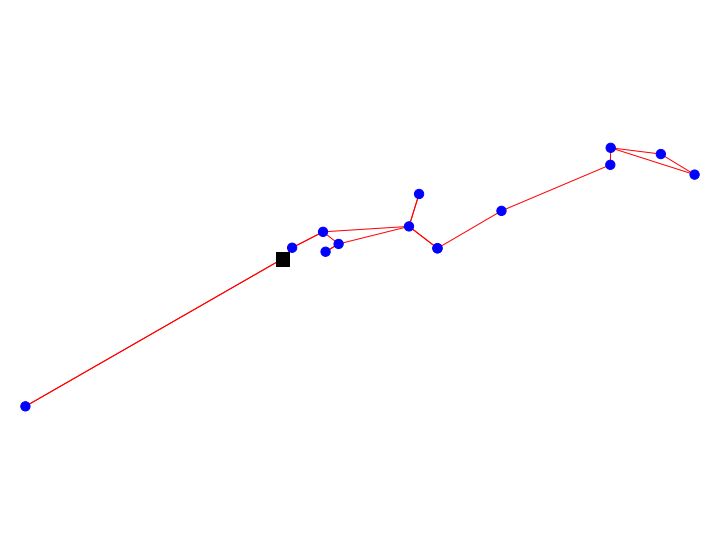

<AxesSubplot:>

In [9]:
pp.plotting.simple_plot(net, respect_switches=False, line_width=1.0, bus_size=1.0, ext_grid_size=1.0, trafo_size=1.0, plot_loads=False, plot_sgens=False, load_size=1.0, sgen_size=1.0, switch_size=2.0, switch_distance=1.0, plot_line_switches=False, scale_size=True, bus_color='b', line_color='r', trafo_color='y', ext_grid_color='k', switch_color='k', library='igraph', show_plot=True, ax=None)

In [10]:
pp.runpp(net)

In [11]:
net.res_line
#pp.to_excel(net, 'Pflow.xlsx')

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-1.096128e+02,-53.229198,1.100943e+02,5.338311e+01,4.815082e-01,0.153912,0.319961,3.199597e-01,0.319961,0.999444,0.003850,1.003552,-0.029442,51.606558
1,-6.400862e+00,-2.947330,6.403545e+00,2.946735e+00,2.683655e-03,-0.000596,0.018503,1.850181e-02,0.018503,0.999444,0.003850,0.999841,0.001099,2.984421
2,-6.400862e+00,-2.947330,6.403545e+00,2.946735e+00,2.683655e-03,-0.000596,0.018503,1.850181e-02,0.018503,0.999444,0.003850,0.999841,0.001099,2.984421
3,-1.432415e+02,-69.539214,1.463475e+02,7.053433e+01,3.106019e+00,0.995118,0.418100,4.180959e-01,0.418100,0.999444,0.003850,1.019724,-0.157750,67.435438
4,-1.345088e+02,-65.197959,1.368244e+02,6.593947e+01,2.315618e+00,0.741512,0.390887,3.908840e-01,0.390887,1.003552,-0.029442,1.019724,-0.157750,63.046338
5,3.947866e+01,19.915094,-3.937714e+01,-1.988397e+01,1.015129e-01,0.031119,0.113796,1.137977e-01,0.113798,1.019724,-0.157750,1.017295,-0.136207,18.354475
6,3.947866e+01,19.915094,-3.937714e+01,-1.988397e+01,1.015129e-01,0.031119,0.113796,1.137977e-01,0.113798,1.019724,-0.157750,1.017295,-0.136207,18.354475
7,3.137500e+01,15.195606,-3.134898e+01,-1.518783e+01,2.601870e-02,0.007776,0.091092,9.109281e-02,0.091093,1.004331,-0.035714,1.003552,-0.029442,14.692389
8,3.137500e+01,15.195606,-3.134898e+01,-1.518783e+01,2.601870e-02,0.007776,0.091092,9.109281e-02,0.091093,1.004331,-0.035714,1.003552,-0.029442,14.692389
9,2.082758e+02,100.872605,-2.053864e+02,-9.994541e+01,2.889344e+00,0.927196,0.587833,5.878352e-01,0.587835,1.033139,-0.263980,1.019724,-0.157750,94.812132


In [12]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.019724,-0.157750,3.656200e+01,1.770778e+01
1,0.999444,0.003850,2.656560e+02,1.286631e+02
2,0.999841,0.001099,0.000000e+00,0.000000e+00
3,1.017295,-0.136207,7.771950e+01,3.764127e+01
4,1.003552,-0.029442,8.711250e+01,4.219051e+01
5,1.033139,-0.263980,-4.043000e+02,-1.958114e+02
6,1.004331,-0.035714,-6.275000e+01,-3.039121e+01
7,1.000000,0.000000,-1.281092e+01,-7.484500e+00
8,0.599885,0.002824,0.000000e+00,0.000000e+00
9,1.016922,-0.145573,0.000000e+00,0.000000e+00


In [13]:
net.res_load

,p_mw,q_mvar
0,87.1125,42.190509
1,303.6060,147.043097
2,77.7195,37.641272
3,36.5620,17.707785
4,5.9313,2.872660
5,18.3702,8.897094
6,8.2263,3.984179
7,18.4773,8.948965
8,111.7000,54.098779


In [14]:
net.res_trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,1.034788,2.126678,-1.032925e+00,-0.470979,0.001863,1.655699,0.006101,0.004883,1.017295,-0.136207,1.016922,-0.145573,1.453037
1,0.001679,1.591509,-9.435013e-09,0.008180,0.001679,1.599689,0.004177,0.000036,1.000000,0.000000,0.599885,0.002824,0.994694
